In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from enhancement_analysis import *
from fit_functions import *
from low_level import readCSVrows,writeCSVrows,calcEnhancement,readCSVcolumns
%matplotlib inline


In [3]:
results=readCSVcolumns('Processed_20190328/data_legend_YAG.csv',skip_header=1)
header = results[1]
print(header)
[YAG,starts,stops]= results[0]

Done! Array read from Processed_20190328/data_legend_YAG.csv
[['YAG Voltage', 'Start', 'Stop']]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

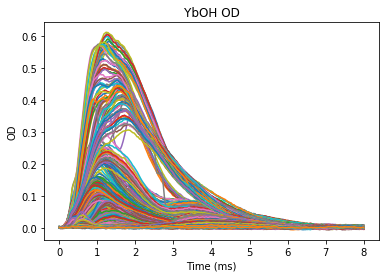

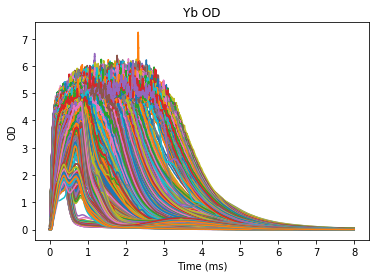

In [4]:
folder = '20190328'
skips = []
ABAB = True

start_arr = starts.astype(int)
stop_arr = stops.astype(int)
YAG_arr = YAG

enhancement = []

b_ODs = []
ub_ODs = []

for _start,_stop in zip(start_arr,stop_arr):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    en = calcEnhancement(b[0],ub[0])
    enhancement.append(en)
    b_ODs.append(b)
    ub_ODs.append(ub)
#p=YbOH integrated, Yb integrated, timestamp

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


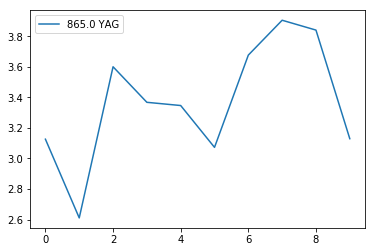

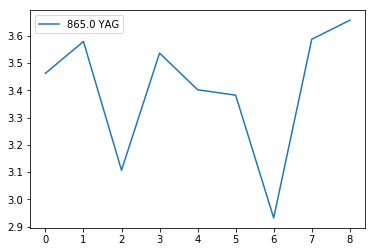

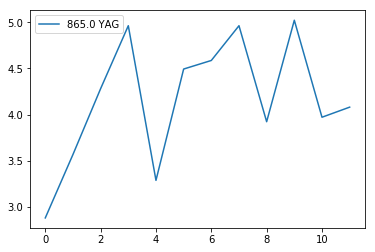

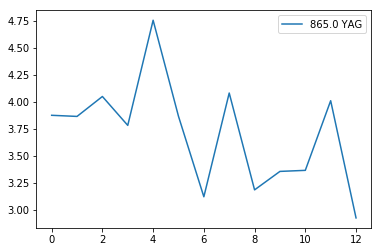

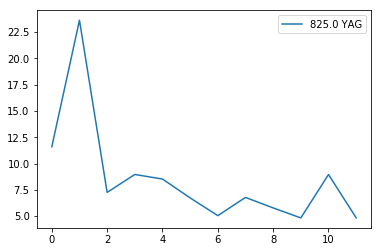

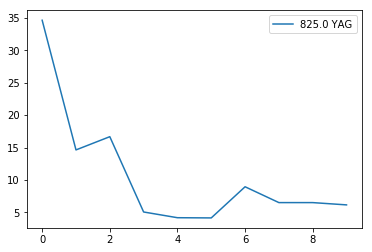

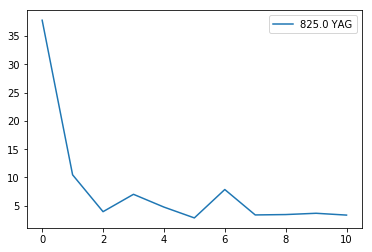

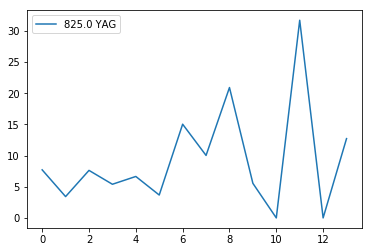

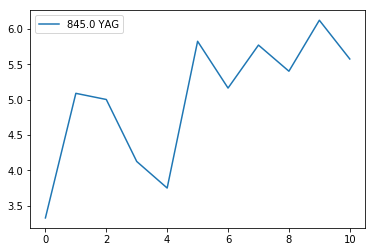

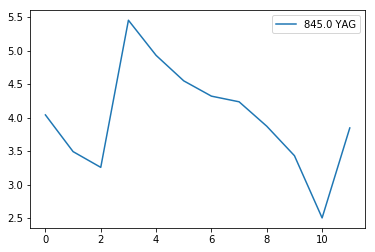

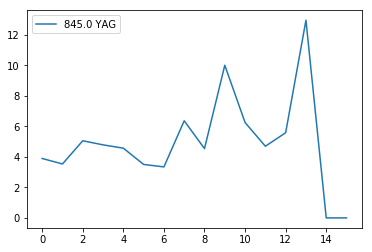

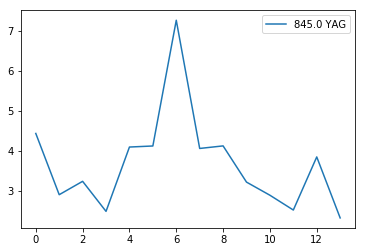

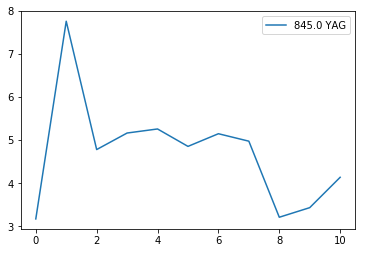

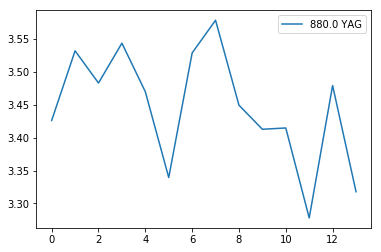

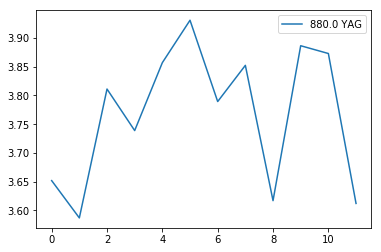

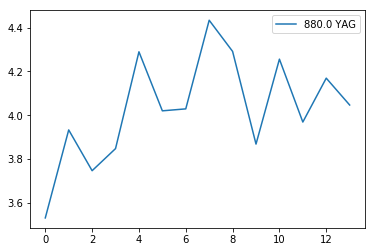

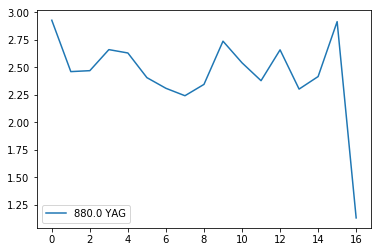

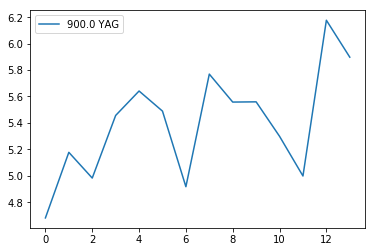

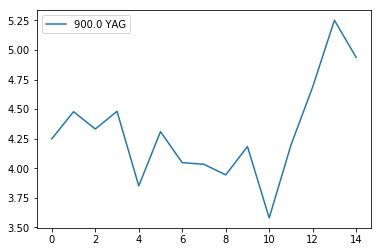

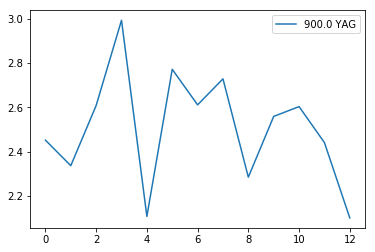

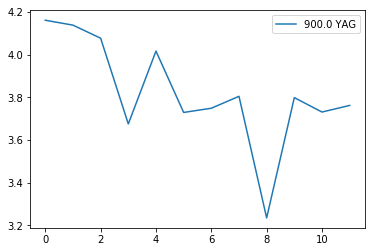

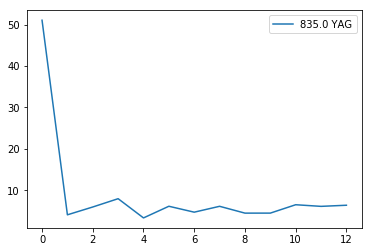

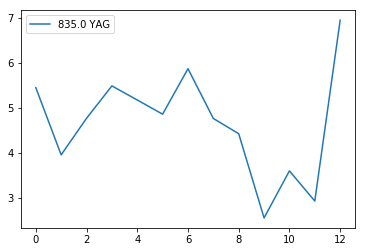

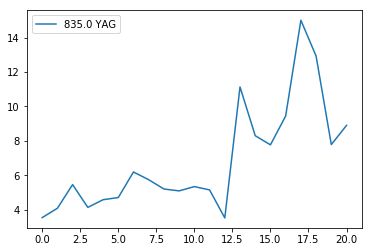

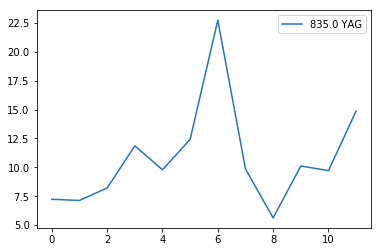

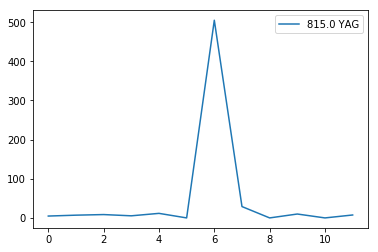

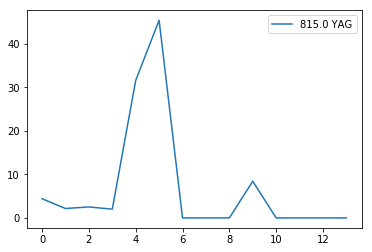

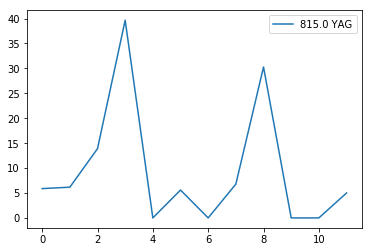

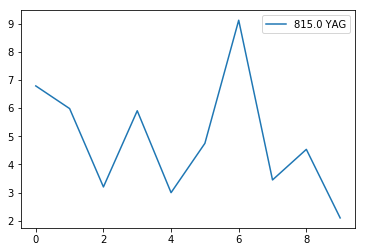

In [26]:
avg = []
err = []
for _en,_y in zip(enhancement,YAG):
    plt.figure()
    plt.plot(_en,label='{} YAG'.format(_y))
    plt.legend(loc='best')
    avg.append(np.array(_en).mean())
    err.append(np.array(_en).std())

In [31]:
en_sort = np.array(sortData(YAG,avg))
enerr_sort = np.array(sortData(YAG,err))
YAG_sort = np.array(sorted(YAG))

(0, 15)

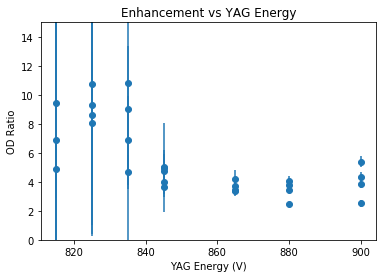

In [34]:
plt.figure()
plt.title('Enhancement vs YAG Energy')
plt.xlabel('YAG Energy (V)')
plt.ylabel('OD Ratio')
plt.errorbar(YAG_sort[0:],en_sort[0:],yerr=enerr_sort[0:],marker='o',linestyle='None')
plt.ylim(0, 15)

In [13]:
YbOH_b = []
YbOH_ub = []
Yb_b = []
Yb_ub = []
for b,ub in zip(b_ODs,ub_ODs):
    YbOH_b.append(b[0])
    Yb_b.append(b[1])
    YbOH_ub.append(ub[0])
    Yb_ub.append(ub[1])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


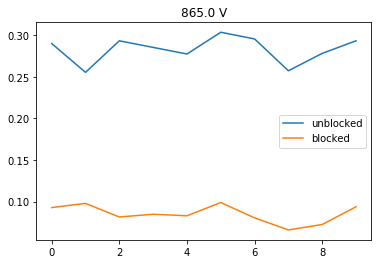

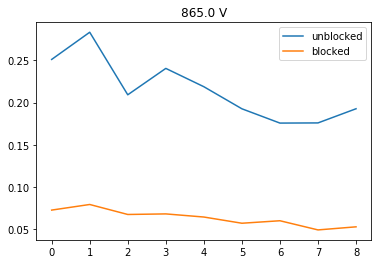

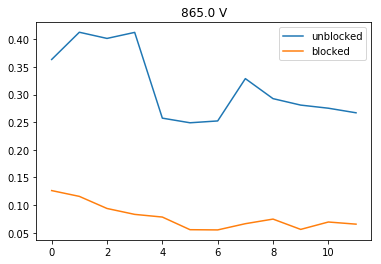

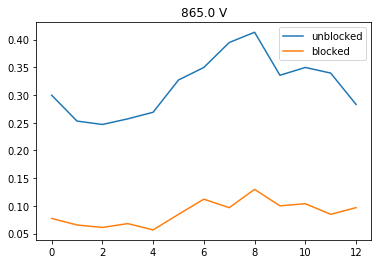

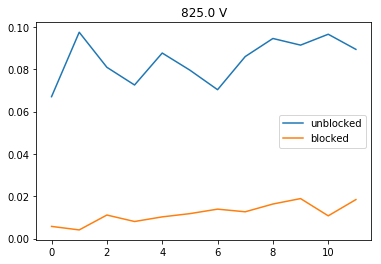

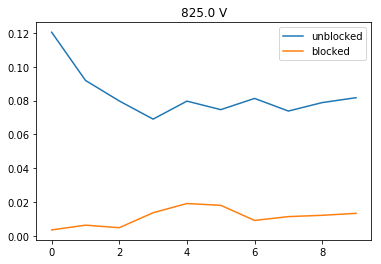

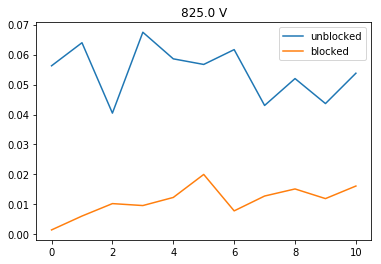

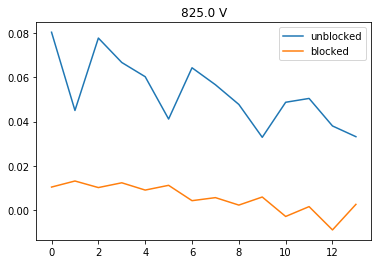

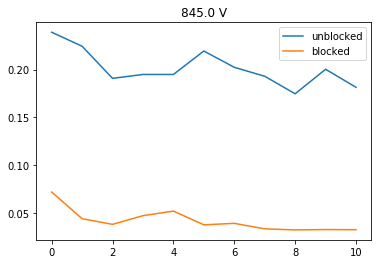

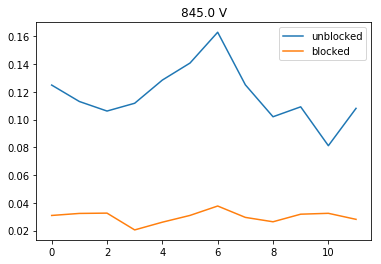

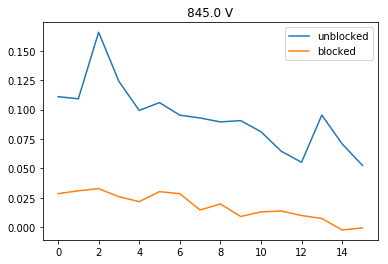

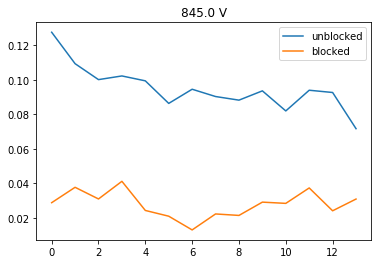

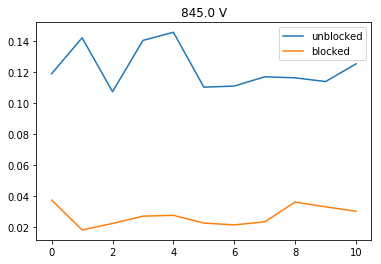

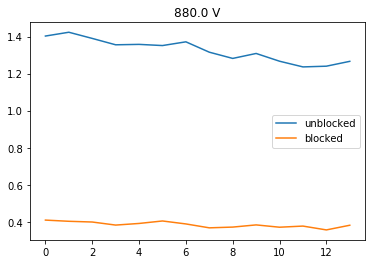

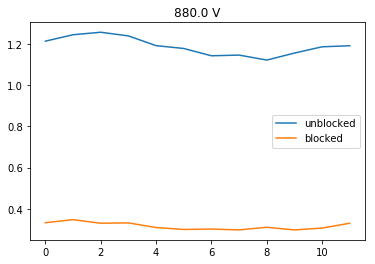

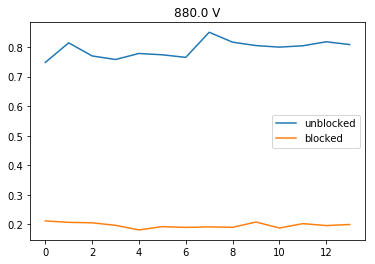

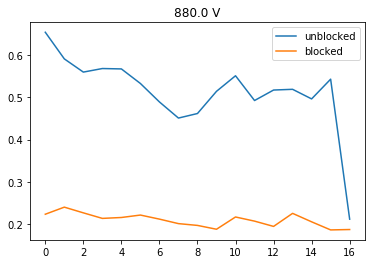

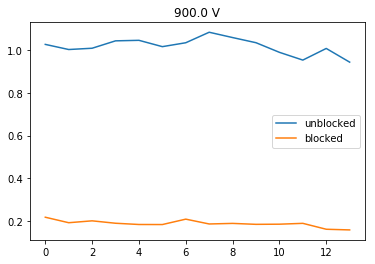

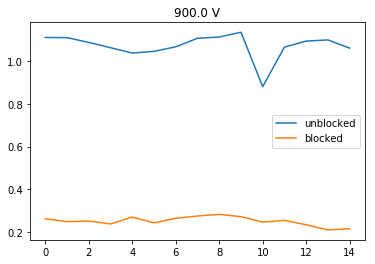

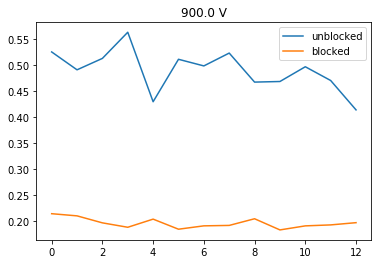

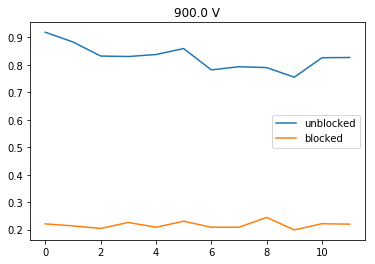

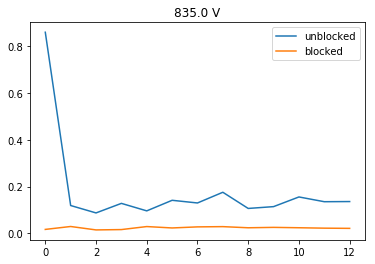

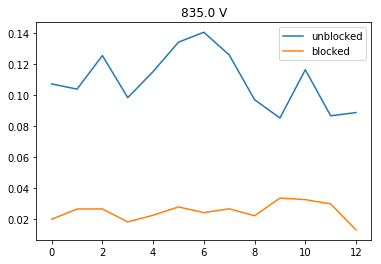

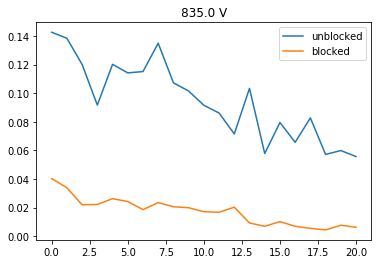

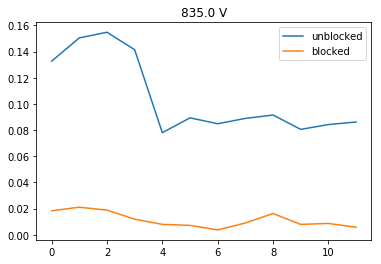

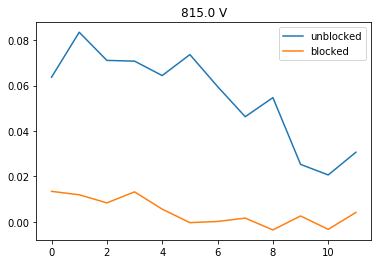

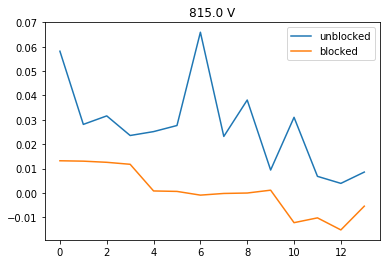

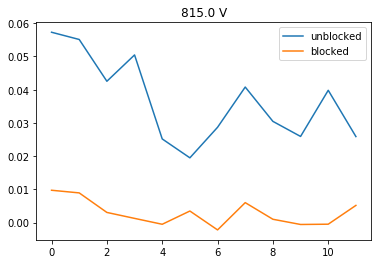

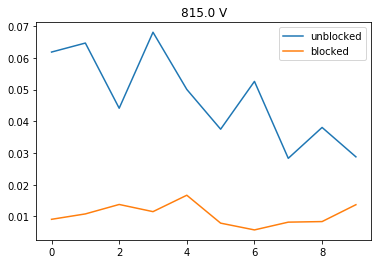

In [14]:
YbOH_avg_b = []
YbOH_avg_ub = []
YbOH_std_b = []
YbOH_std_ub = []
for _b,_ub,_y in zip(YbOH_b,YbOH_ub,YAG):
    _b = np.array(_b)
    _ub = np.array(_ub)
    plt.figure()
    plt.title('{} V'.format(_y))
    plt.plot(_ub,label='unblocked')
    plt.plot(_b,label='blocked')
    plt.legend(loc='best')
    YbOH_avg_b.append(_b.mean())
    YbOH_avg_ub.append(_ub.mean())                  
    YbOH_std_b.append(_b.std())
    YbOH_std_ub.append(_ub.std())

In [16]:
YbOHavg_b_sort = np.array(sortData(YAG,YbOH_avg_b))
YbOHstd_b_sort = np.array(sortData(YAG,YbOH_std_b))
YbOHavg_ub_sort = np.array(sortData(YAG,YbOH_avg_ub))
YbOHstd_ub_sort = np.array(sortData(YAG,YbOH_std_ub))
YAG_sort = np.array(sorted(YAG))

In [17]:
data = np.array([np.array(YAG_sort),np.array(YbOHavg_b_sort),np.array(YbOHstd_b_sort),np.array(YbOHavg_ub_sort),np.array(YbOHstd_ub_sort)])
data.T

array([[8.15000000e+02, 6.23500000e-04, 3.18259753e-03, 2.72327857e-02,
        1.21685773e-02],
       [8.15000000e+02, 2.91175000e-03, 3.71532067e-03, 3.68008333e-02,
        1.36799492e-02],
       [8.15000000e+02, 4.44150000e-03, 5.82571504e-03, 4.73851000e-02,
        1.74714593e-02],
       [8.15000000e+02, 1.05875000e-02, 9.07295883e-03, 5.53596667e-02,
        1.95552059e-02],
       [8.25000000e+02, 5.49942857e-03, 4.41077009e-03, 5.31142857e-02,
        8.45453167e-03],
       [8.25000000e+02, 1.11112000e-02, 4.83135441e-03, 5.43315455e-02,
        9.92085357e-03],
       [8.25000000e+02, 1.12467273e-02, 4.99299609e-03, 8.30636000e-02,
        1.36830601e-02],
       [8.25000000e+02, 1.18639167e-02, 6.04454921e-03, 8.44240833e-02,
        1.46910793e-02],
       [8.35000000e+02, 1.14018333e-02, 4.77401414e-03, 9.50881905e-02,
        1.76821928e-02],
       [8.35000000e+02, 1.72986667e-02, 5.52707626e-03, 1.05211833e-01,
        2.71907700e-02],
       [8.35000000e+02, 2.3261

In [18]:
lbls = ['YAG Voltage (V)','Blocked YbOH Integrated OD (ms)','Blocked Sigma (ms)','Unblocked YbOH Integrated OD (ms)','Unblocked Sigma (ms)']
data = np.array([np.array(YAG_sort),np.array(YbOHavg_b_sort),np.array(YbOHstd_b_sort),np.array(YbOHavg_ub_sort),np.array(YbOHstd_ub_sort)])
save_all = []
save_all.append(lbls)
for _data in data.T:
    save_all.append(_data)

In [19]:
writeCSVrows(save_all,'Processed_20190328/blocked_unblocked_YbOH_vs_YAGV.csv')

Done! Array written to Processed_20190328/blocked_unblocked_YbOH_vs_YAGV.csv


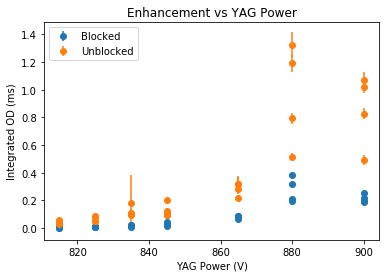

In [22]:
plt.figure()
plt.title('Enhancement vs YAG Power')
plt.xlabel('YAG Power (V)')
plt.ylabel('Integrated OD (ms)')
plt.errorbar(YAG_sort,YbOHavg_b_sort,yerr=YbOHstd_b_sort,marker='o',linestyle='None',label='Blocked')
plt.errorbar(YAG_sort,YbOHavg_ub_sort,yerr=YbOHstd_ub_sort,marker='o',linestyle='None',label='Unblocked')
plt.legend(loc='best')

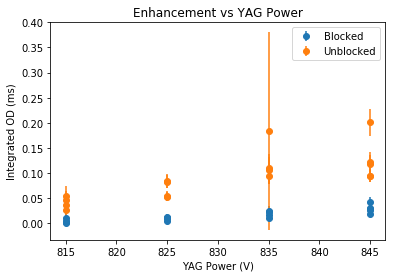

In [24]:
plt.figure()
plt.title('Enhancement vs YAG Power')
plt.xlabel('YAG Power (V)')
plt.ylabel('Integrated OD (ms)')
plt.errorbar(YAG_sort[:-12],YbOHavg_b_sort[:-12],yerr=YbOHstd_b_sort[:-12],marker='o',linestyle='None',label='Blocked')
plt.errorbar(YAG_sort[:-12],YbOHavg_ub_sort[:-12],yerr=YbOHstd_ub_sort[:-12],marker='o',linestyle='None',label='Unblocked')
plt.legend(loc='best')

In [23]:
rows,header = readCSVcolumns('Processed_20190307/enhancement_max_width.csv',skip_header=1)
print(header)
powers_2 = rows[0]
max_2 = rows[1]
maxerr_2 = rows[2]

Done! Array read from Processed_20190307/enhancement_max_width.csv
[['Power (mW)', 'Maximum Enhancement', 'Max Error', 'Width (MHz)', 'Width Error (MHz)']]


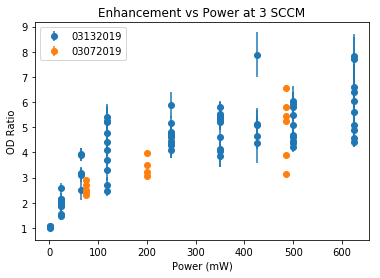

In [27]:
plt.figure()
plt.title('Enhancement vs Power at 3 SCCM')
plt.xlabel('Power (mW)')
plt.ylabel('OD Ratio')
plt.errorbar(powers,avg,yerr=err,marker='o',linestyle='None',label='03132019')
plt.errorbar(powers_2,max_2,yerr=maxerr_2,marker='o',linestyle='None',label='03072019')
plt.legend(loc='best')

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

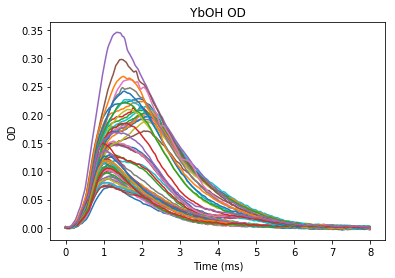

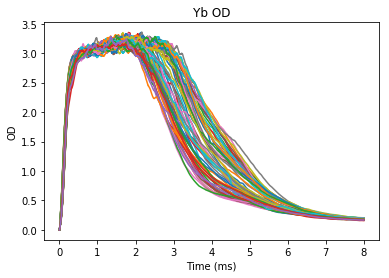

In [41]:
folder = '20190313'
skips = []
ABAB = True

start_arr = [2739,2756,2782]
stop_arr = [2755,2781,2803]
power_arr = [133,133,133]

enhancement2 = []

b_ODs2 = []
ub_ODs2 = []

for _start,_stop in zip(start_arr,stop_arr):
    
    ODs_1 = calculateSeriesOD(folder,_start,_stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,_start+1,_stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    en = calcEnhancement(b[0],ub[0])
    enhancement2.append(en)
    b_ODs2.append(b)
    ub_ODs2.append(ub)
#p=YbOH integrated, Yb integrated, timestamp

2.090828079828399
0.20448421581384055
2.8013711186726415
0.343404812583133
2.6744909189075154
0.30591658659577187


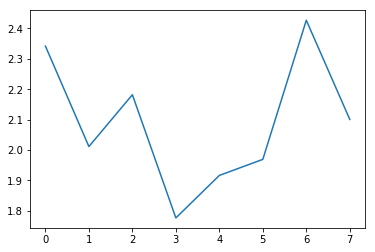

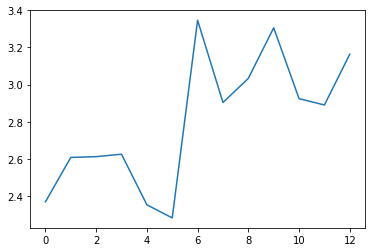

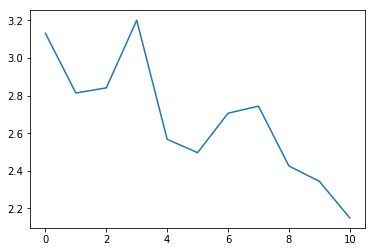

In [44]:
avg = []
err = []
for _en in enhancement2:
    plt.figure()
    plt.plot(_en)
    avg.append(np.array(_en).mean())
    print(avg[-1])
    err.append(np.array(_en).std())
    print(err[-1])

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

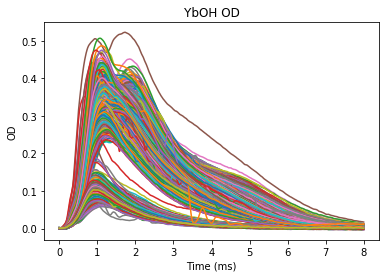

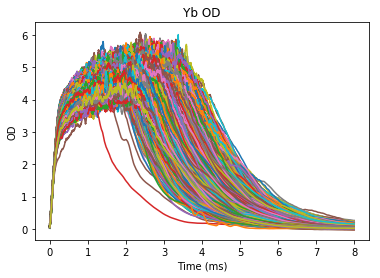

In [7]:
folder = '20190308'
skips = []
ABAB = True

start_stop = [
    [436,513],
    [514,569],
    [570,610],
    [611,660],
    [661,705],
    [706,760],
    [762,838],
    [839,896],
    [897,946],
    [949,993],
    [994,1053],
    [1054,1092],
    [1093,1107]
]

label_2 = [
    'gas crank in middle',
    'new 6.8sccm',
    'new',
    'new 9sccm',
    'new',
    'same 4.9 sccm',
    'new',
    'new',
    'same 3 sccm',
    'new',
    'new',
    'new',
    'new'
]

en_sccm = []
b_sccm = []
ub_sccm = []

for i in range(len(start_stop)):
    start,stop = start_stop[i]
    ODs_1 = calculateSeriesOD(folder,start,stop,skips,ABAB=ABAB)
    ODs_2 = calculateSeriesOD(folder,start+1,stop,skips,ABAB=ABAB)
    
    p_1 = processData(ODs_1,[0,8])
    p_2 = processData(ODs_2,[0,8])
    b,ub = identifyBUB(p_1,p_2,equal=True)
    b_sccm.append(b)
    ub_sccm.append(ub)
    _en = calcEnhancement(b[0],ub[0])
    en_sccm.append(_en)
#p=YbOH integrated, Yb integrated, timestamp

A Jupyter Widget

A Jupyter Widget

Mean =  1.2250965751178
STD =  0.1053542838634138


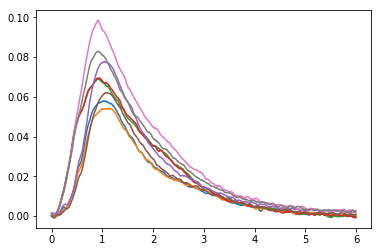

In [25]:
blocked = ODs_1[0]
unblocked = ODs_1[1]
int_b=integrateODSeries(blocked[0],blocked[-1],start_stop=[0,6])
int_ub=integrateODSeries(unblocked[0],unblocked[-1],start_stop=[0,6])
enhancements = calcEnhancement(int_b,int_ub)
en = np.array(enhancements)
print('Mean = ',en.mean())
print('STD = ',en.std())

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

18
18
18
18
18
18
18
18


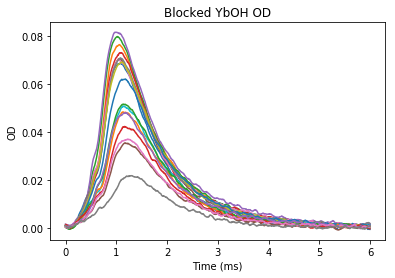

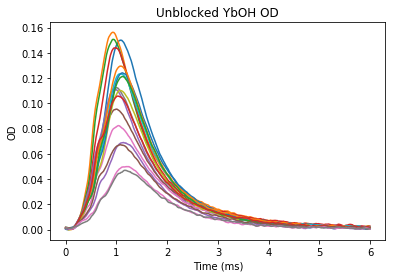

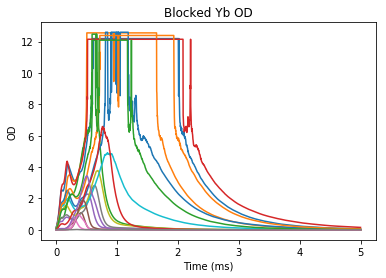

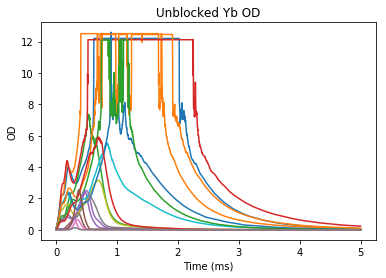

In [3]:
freq=[6563,6522,6458,6578,6716,6806,6905,6677,6653,6614,6596,6548,6515,6477,6405,6333,6291,6231]

start_stop_YbOH_blocked = [0,6]
start_stop_YbOH_unblocked = [0,6]
start_stop_Yb_blocked = [0,5]
start_stop_Yb_unblocked = [0,5]
data = processIVData(*ODs_208,freq,start_stop_YbOH_blocked,start_stop_YbOH_unblocked,start_stop_Yb_blocked,start_stop_Yb_unblocked)
YbOH_enhancement = data[0]
Yb_enhancement = data[1]
YbOH_int = data[-2]
freq = data[2]

Text(0,0.5,'Integrated OD Ratio')

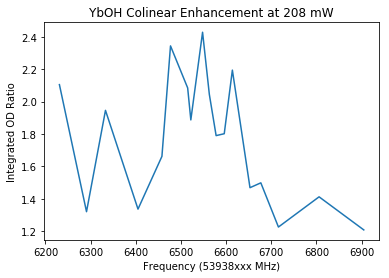

In [13]:
plt.plot(freq,YbOH_enhancement)
plt.xlabel('Frequency (53938xxx MHz)')
plt.title('YbOH Colinear Enhancement at 208 mW')
plt.ylabel('Integrated OD Ratio')

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

FloatProgress(value=0.0, max=1.0)

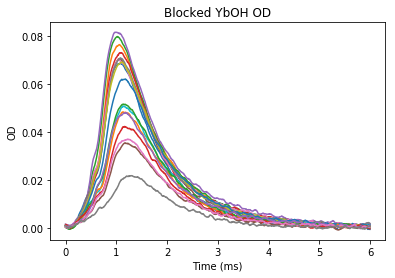

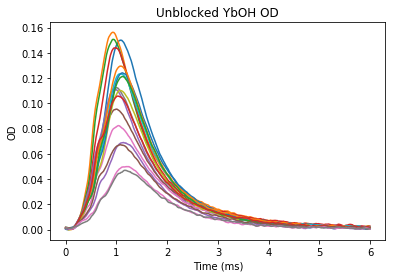

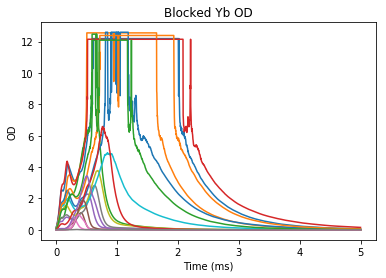

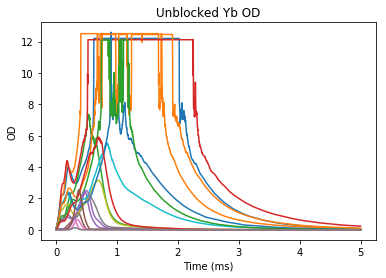

In [14]:
blocked,unblocked = process_BUB(*ODs_208,start_stop_YbOH_blocked,start_stop_YbOH_unblocked,start_stop_Yb_blocked,start_stop_Yb_unblocked)

In [16]:
b_YbOH = blocked[0]
ub_YbOH = unblocked[0]

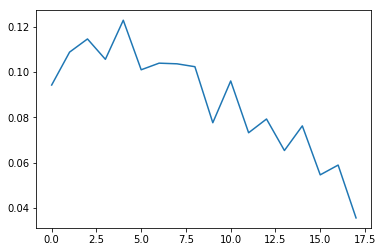

In [17]:
plt.plot(b_YbOH)

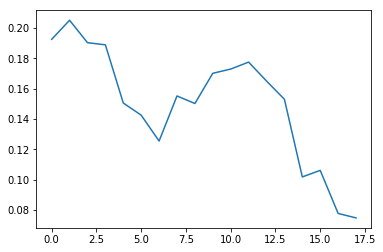

In [18]:
plt.plot(ub_YbOH)

In [19]:
enhance = [ub/b for ub,b in zip(ub_YbOH,b_YbOH)]

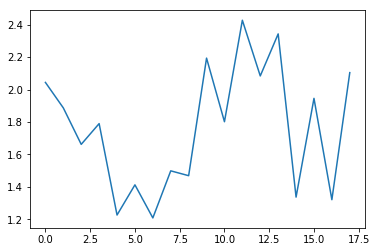

In [20]:
plt.plot(enhance)

In [21]:
bch1,ch2,bparams = calculateSingleOD(folder,3)

0.089838

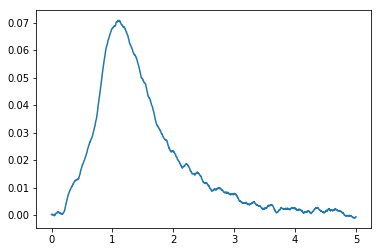

In [24]:
sliceIntegrate(bch1,timeArray(bparams),[0,5],1)

0.395341

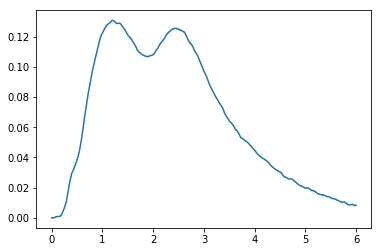

In [27]:
uch1,ch2,uparams = calculateSingleOD('20190226',5072)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

0.399509

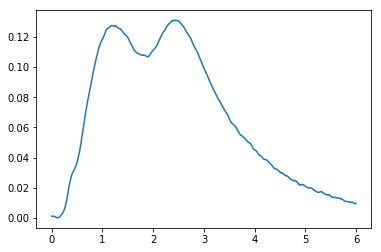

In [28]:
uch1,ch2,uparams = calculateSingleOD('20190226',5070)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

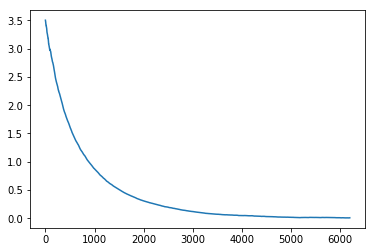

In [39]:
[ch1,ch2],params = calculateSingleOD('20190328',66)
time = timeArray(params)
plt.plot(ch2[3800:])

In [44]:
def expoDecay(x,tau,a,c):
    f = a*np.exp(-(x)/tau)+c
    return f

def fitExpoDecay(xscale,data,guess=[1,3,0],sigma=None,bounds=None,plot=True,verbose=False):
    #bounds = ([0,0,-np.inf,-np.inf,-np.inf],[abs(xscale).max(),abs(xscale).max(),np.inf,np.inf,np.inf])
    if xscale[0] != 0:
        xscale-=xscale[0]
    guess[1]=data.max()
    function = expoDecay
    params,error,residuals = fitFunction(xscale,data,function,guess,sigma,plot,bounds=bounds)
    if verbose:
        print('\n')
        print('Fit error = ',error)
        print('FIT PARAMS = ',params)
    return [params,error,residuals]

[0.780078 3.234285 0.022164] [0.000996 0.002503 0.000532]


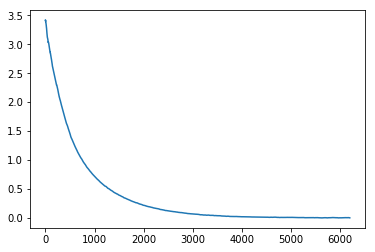

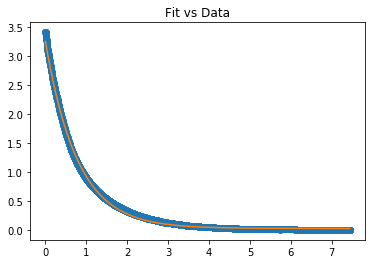

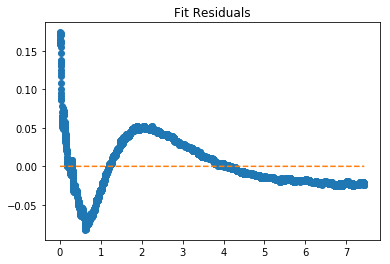

In [77]:
[ch1,ch2],params = calculateSingleOD('20190328',113)
time = timeArray(params)
plt.plot(ch2[3800:])
decay = ch2[3800:]
t = time[3800:]
params,error,residuals = fitExpoDecay(t,decay)
print(params,error)

In [24]:
uch1,ch2,uparams = calculateSingleOD('20190226',3429)
sliceIntegrate(uch1,timeArray(uparams),[0,6],1)

ValueError: not enough values to unpack (expected 3, got 2)

In [1]:
for i in range(4):
    if i==2:
        continue
    print(i)

0
1
3


In [6]:
import numpy as np
x=np.array([1,2,3,4])

In [10]:
type(x)

numpy.ndarray

In [11]:
type([x])

list

In [12]:
type([])

list

In [13]:
len([])

0

In [19]:
x = [1,2]

In [21]:
if x:
    print(2)

2
